## Predicting how likely a passenger, aboard in the famous Titanic ship, is to survive in the disaster.
Titanic classification challenge is one of the popular challenges in the machine learning community, especially among those who have just entered in this field. The main propose of this challenge is to identify which passengers are likely to survive, the Titanic disaster, given his/her various attributes like age, sex, class of travel, etc. The Titanic dataset holds all the information about the passengers who were aboard when the disaster occurred and has the information about the passengers who survived and who don't. For more details about the dataset and the problem, you can go to this [link](https://www.kaggle.com/c/titanic).

## Mount Google Drive Locally.
Since our dataset lives in google drive, we need to mout the google drive into our virtual machine inorder to use the dataset. For details about how to mount google drive locally, you can go through this [link](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH).

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Import all the required packages
In this project we will be using one of the simple machine learning algorithms - Logistic Regression.

In [0]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Explore the dataset
Now, lets import the titanic dataset, which is inside Data directory in my Google Drive.  We are reading the dataset as a pandas dataframe, which helps us to explore the dataset, for instance we can have looke at the first few rows in our dataset, we can generate the summary for each of the numerical columns, and so on. For more information about the pandas dataframe and all of its associated methods click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [0]:
titanicDataset = pd.read_csv('/content/gdrive/My Drive/Data/titanic.csv')

# displays top 5 rows
titanicDataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [0]:
# displays summary for each (numerical) column
titanicDataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


The count represents the number of rows or total number of examples in the dataset. The mean and std are the mean value and the standard deviation. 25%, 50% and 75% denotes repectively the first quartile (**Q1**), second quartile(**Q2**) or the median and third quartile (**Q3**). The min and max are the minimum and maximum value respectively.

Let's explore the dataset in more details. First, let's see whethter the gender of the passenger have any kind of influence on the outcome of the disaster. For generating plots I will be using `matplotlib.pyplot`. For a complete documentation please visit the matplotlib official documentation [page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

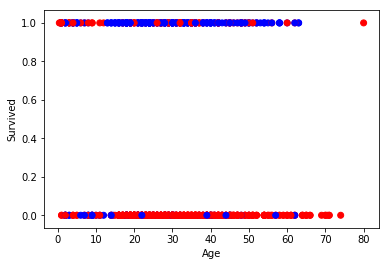

In [0]:
color = list(map(lambda x: 'r' if x == "male" else 'b', titanicDataset['Sex']))
plt.scatter(titanicDataset['Age'], titanicDataset['Survived'], c=color)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In the above plot, the x-axis represents age and y-axis represents whether the passenger survived or not (0 means not survived and 1 means survived). From the plot, any passenger above 65 years of ages all seem failed to survive except for one passenger who is 80 years and yet survived. Hence, we can say that the older passengers were more likely to die than the younger. 

Similarly, the color in the above plot represents the gender of a passenger (*red denotes male and blue denotes female*). And from the graph, it is surprising to see that most of the passenger who survived were female and the ones who died were male. Therefore, sex could be another important factor in determining whether the passenger would survive or not. 

Now, lets see whether the travelling class of a passenger has an influence in determining whether a passenger survives or not.

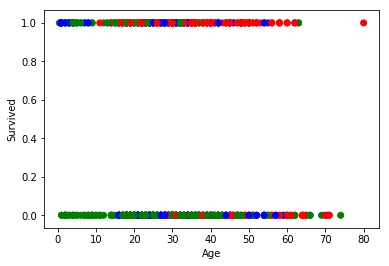

In [0]:
color = list(map(lambda x: 'r' if x == 1 else 'b' if x == 2 else 'g', titanicDataset['Pclass']))
plt.scatter(titanicDataset['Age'], titanicDataset['Survived'], c=color)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In the above plot, red denotes the First class passengers, blue represents the second class passengers, and green represents the third class. From the graph, it is clear that, majority of the passengers who survived were travelling in first class and those who didnot survived were travelling in third class. Hence, the travelling class could be another important deciding factor, whether a passenger survives or not.

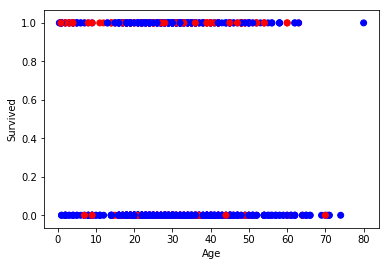

In [0]:
color = list(map(lambda x: 'r' if x == 1 else 'b', titanicDataset['Siblings/Spouses Aboard']))
plt.scatter(titanicDataset['Age'], titanicDataset['Survived'], c=color)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In the above plot, red color represents those passengers whose sibblings / spouse were also boarded with them and blue represents those who were alone. From the plot, most of the passengers who died were alone. Also children who had their sibblings with them were more likely to survive.

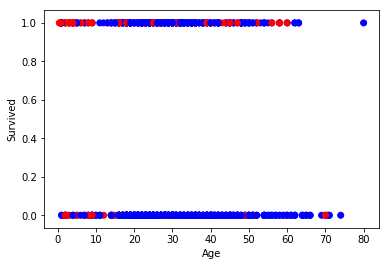

In [0]:
color = list(map(lambda x: 'r' if x == 1 else 'b', titanicDataset['Parents/Children Aboard']))
plt.scatter(titanicDataset['Age'], titanicDataset['Survived'], c=color)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In the above plot, red represents passengers whose parent or children were aboard and blue represents those passengers whose parents or children were not aboard. From the graph, we can see that the passengers whose parents/children were not aboard, most of them didn't survived.


For passenger name and ticket fare we won't be doing any kind of analysis because name is just a word and I don't think name has to anything do with whether the passenger survive or not, unless you believe in may be astrology and things like that. Likewise, fare is just amount of money paid for the ticket and it will vary depending on the purchased travelling class.



## Prepare Data
Now let's split our dataset into two part, training and test set. We will use training set to train our models and the test set to test our trained model. Here I will be splitting the dataset by 80:20, meaning 80% will be used as training set and 20% will be used as test set. Obviously you can write your own script to split the dataset into train and test set. However, there is a built-in support for this task in `sklearn` package. For more details click [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In our dataset, we have two non-numeric columns, i.e. Name and Sex and we have to convert them to numeric. Since Sex is just a binary variable, i.e. whether male or female, we can replace it by 1 and 2 where 1 means male and 2 means female. However, name is a bit tricky because people can have all different kind of names. As mentioned above, here Name and Fares variables don't have much meaning when dealing with the problem we are addressing, so we will exclude those two variables from our train and test set.

In [0]:
# All features except Survived will be used as X or independent variables.
# Survived column will be used as Y or dependent variable.
X = titanicDataset.iloc[:,1:8]
Y = titanicDataset.iloc[:, 0]

# convert sex to binary variable
X['Sex'] = [1 if sex == 'male' else 2 for sex in X['Sex']]

# remove the name and fare columns
X = X.drop(['Name', 'Fare'], axis = 1)

# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, 
                                                    test_size = 0.2,    # test set size (20%)
                                                    train_size=0.8,     # train set size (80%)
                                                    random_state = 12, # seed
                                                    shuffle = True      # shuffle the dataset
                                                   )


## Build Model
Now we have our training and test dataset ready, next step is to build a model. A model is just a mathematical function which accepts inputs, do some mathematical operations and outputs the result. Of many algorithms, we will be using logestic regression. Like Linear Regression, Logistic regressions also use linear combination of the cofficients to predict output. The difference is that in logistic regression the output of the linear combination of the coefficients and the input features are passed through a sigmoid function and hence the output of the logistic regression is always between 0 and 1, meaning logistic regression outputs the probabilites of being in one class or the other, given the input features. For more information about logistic regression click on [this](https://en.wikipedia.org/wiki/Logistic_regression) wikipedia page.

In [0]:
logit_model = LogisticRegression(solver = 'liblinear',
                                 multi_class = 'ovr'
                                );
# train the classifier on training dataset
logit_model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Now, we have our trained logistic model. We can now use our model to predict on test dataset.

In [0]:
# prediction for first row in the test dataset
prediction = logit_model.predict_proba(np.asarray(test_x.iloc[0]).reshape(1,-1))
print("Prediction for 1st passenger in the test set:")
print(prediction)
print("Ground Truth value:")
test_y.iloc[0]

Prediction for 1st passenger in the test set:
[[0.843238 0.156762]]
Ground Truth value:


0

The model outputs the probabilities for each of the clases, i.e survived or not survived. The predicted estimates are ordered by the label of classes. In this case 0 means not survived and 1 means survived, meaning the first probability is for not survived cases and the second one is for survived. Hence, for the first example, our model predicts that, the passenger has not survived, which satisfies with the ground truth.

The `sklearn` package provides a `score()` method which returns the average accuracy on the given test dataset.

In [0]:
logit_model.score(test_x, test_y)

0.8539325842696629

## Describing the Predictive performance of our model.
For a classification problem, there are two ways of describing the performance of a model, i.e. Confusion matrix and auc (Area Under Curve) - roc (Receiver Operating Characteristics) curve. In this tutorial, we will be using an auc-roc curve as a measure of describing the predictive performance of our logistic model.

ROC is a probability curve which is the ration of True Positive Rate(TPR) and False Positive Rate (FPR). In this example, I have set the survived class as positive and not survived class as negative. So, a TPR (sensitivity or recall) is the proportion of survived passengers that are correctly identified as survived by our model. And, a FPR is the proportion of not survived passengers that are incorrectly identified as survived by our model. AUC is the area under the ROC curve and tells the discriminative power of the mode. Hence, heigher the AUC, better the model in distinguishing the classes.

The `sklearn` has built-in support to calculate the TPR and FPR and the AUC, through `sklearn.metrics`. For more details please visit [this](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) page.

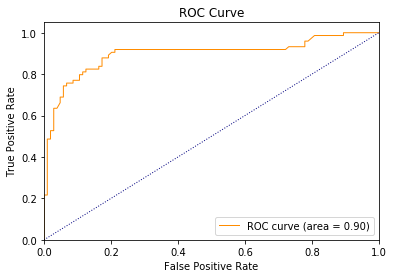

In [0]:
from sklearn.metrics import roc_curve, auc

n_classes = 2 # number of classes; set to 2 in this case

# compute confidence score for all examples
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
# In Binary Classification problem, if a confidence score is >0 then it would predict 1
# otherwise 0 as the class level.
y_score = logit_model.decision_function(test_x)



# Compute ROC and ROC area for each class

fpr,tpr, _ = roc_curve(test_y, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# plot auc-roc Curve using matplotlib
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Next
In the next project, we will look other algorithms, especially ensamble techniques like Random Forest and Gradient Boosting, and Support Vector Machines(SVMs).